In [1]:
import pymetheus
import itertools
from pymetheus.pymetheus import LogicNet
import numpy as np
ll = LogicNet()

In [2]:
ll.constant('John', definition=np.random.normal(0,.1,size=2), size=2)
ll.constant('Jim', definition=np.random.normal(0,.1,size=2), size=2)
ll.constant('Jack', definition=np.random.normal(0,.1,size=2), size=2)
ll.constant('Mary', definition=np.random.normal(1,.1,size=2), size=2)
ll.constant('Meggy', definition=np.random.normal(1,.1,size=2), size=2)
ll.constant('Mina', definition=np.random.normal(1,.1,size=2), size=2)

In [3]:
ll.constant('Person1', size=2)
ll.constant('Person2', size=2)

In [4]:
for a,b in ll.constants.items():
    print(a,b)

John tensor([-0.1074,  0.1307])
Jim tensor([-0.1276,  0.0426])
Jack tensor([-0.0971, -0.0765])
Mary tensor([0.9836, 1.1080])
Meggy tensor([0.9704, 1.0358])
Mina tensor([1.0191, 0.9091])
Person1 tensor([1.3159, 0.3946], requires_grad=True)
Person2 tensor([0.0605, 0.1575], requires_grad=True)


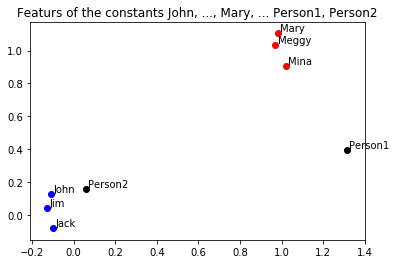

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')
plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


In [6]:
ll.predicate('Male', arity=1, size = 2) # A is a unary predicate on objects with 2 features
ll.predicate('Female', arity=1, size = 2) # B is a unary predicato on objects with 2 features
ll.predicate('CanPlayWith', arity=2, size = 2) # R is a binary relation on objects with 2 features 

In [7]:
print(ll.reason('Male(John)'))
print(ll.reason('Female(John)'))
print(ll.reason('Male(Jack)'))
print(ll.reason('Female(Mary)'))
print(ll.reason('CanPlayWith(John,Mary)'))

0.54096115
0.49421751
0.52920896
0.5197911
0.46895936


In [8]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])

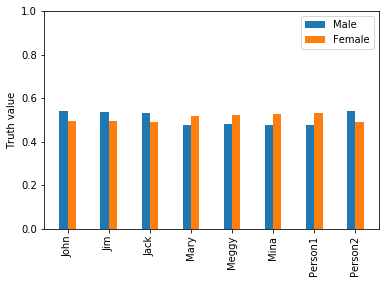

In [9]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

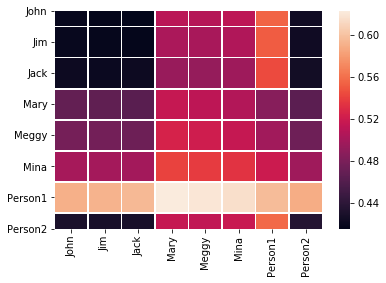

In [10]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()

In [11]:
ll.knowledge("Male(John)")
ll.knowledge("Male(Jack)")
ll.knowledge('~Male(Mary)')
ll.knowledge('~Male(Meggy)')
ll.knowledge('Female(Mary)')
ll.knowledge('Female(Meggy)')
ll.knowledge('~Female(John)')
ll.knowledge('~Female(Jack)')
ll.knowledge('CanPlayWith(John,Mary)')
ll.knowledge('CanPlayWith(Meggy,Jack)')
ll.knowledge('~CanPlayWith(Meggy,Mary)')
ll.knowledge('~CanPlayWith(Jim,Jack)')
ll.knowledge('CanPlayWith(Person1,Jim)')
ll.knowledge('CanPlayWith(Person2,Mina)')

In [16]:
domain_of_variables = np.random.uniform(0,1,size=(100,2))
ll.variable('?x', domain_of_variables, named=False)
ll.variable('?y', domain_of_variables, named=False)


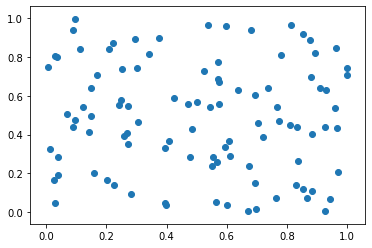

In [17]:
plt.scatter(domain_of_variables[:,0],domain_of_variables[:,1])
plt.show()

In [18]:
ll.universal_rule('forall ?x,?y: ((Male(?x) & Female(?y)) -> CanPlayWith(?x,?y))')
ll.universal_rule('forall ?x,?y: ((Female(?x) & Male(?y)) -> CanPlayWith(?x,?y))')
ll.universal_rule('forall ?x,?y: (CanPlayWith(?x,?y) -> (Male(?x) & Female(?y)) | (Female(?x) & Male(?y)))')
ll.universal_rule('forall ?x,?y: (CanPlayWith(?x,?y) -> CanPlayWith(?y,?x))')
ll.universal_rule('forall ?x: Male(?x) -> ~Female(?x)')
ll.universal_rule('forall ?x: Female(?x) -> ~Male(?x)')
#ltnw.universal_rule('forall x:(Male(x) % ~Female(x))')

In [19]:
ll.learn(epochs=1000, batch_size=25)

Current Satisfiability 0.982772):   1%|          | 12/1000 [01:39<2:14:51,  8.19s/it]

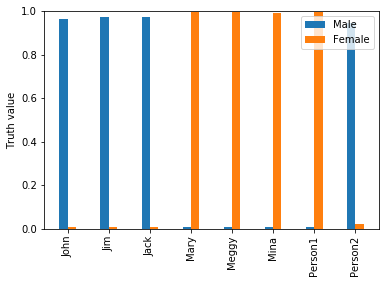

In [21]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])

fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

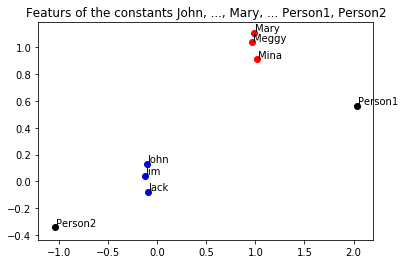

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')
plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


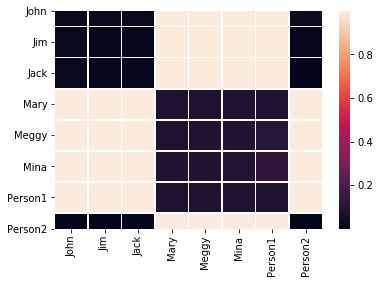

In [23]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()